# **PROGRAMACIÓN 2**

# Actividad Autónoma 8

# Investigación Formativa

## Unidad 3: Análisis de la Información

## Unidad 4:

Integrantes: 

Fecha: 30/01/2026

Carrera: Ciencia de Datos e Inteligencia Artificial

Periodo académico:  2S-2025

Semestre: Segundo "C"

**Dataset elegido:** Car Price Prediction Dataset (archivo adjunto: car_price_prediction_with_missing.csv)

Este dataset contiene 2,500 registros (con algunos valores faltantes) de automóviles con las siguientes características:

* **Características técnicas:** Año, tamaño del motor, tipo de combustible, transmisión, kilometraje

* **Características descriptivas:** Marca, modelo, condición (Nuevo/Usado/Like New)

* **Variable objetivo:** Precio

**Justificación de la Selección**

**Relevancia del Dataset:**
1. **Problema del mundo real:** La predicción de precios de automóviles es un problema común en la industria automotriz, fintech y plataformas de compraventa.
2. **Complejidad adecuada:** Combina variables numéricas (año, kilometraje, tamaño del motor) y categóricas (marca, tipo de combustible, condición).
3. **Valores faltantes:** Presenta desafíos reales de limpieza de datos que requieren estrategias de imputación.
4. **Potencial predictivo:** Relación multifactorial que permite aplicar y comparar múltiples algoritmos de ML.

**Aplicaciones prácticas:**
* **Valuación automotriz:** Herramientas para tasar vehículos usados
* **Recomendación de precios:** Para vendedores en plataformas digitales
* **Análisis de mercado:** Entender factores que más impactan el valor residual
* **Detección de anomalías:** Identificar precios atípicos o sospechosos

**Preguntas de Investigación**

**¿Cómo influyen la condición del vehículo ("New", "Used", "Like New") y el kilometraje en el precio, y existe una interacción significativa entre estas variables?**

**Hipótesis:** Los vehículos en condición "New" mantendrán precios más altos independientemente del kilometraje, mientras que en vehículos "Used" y "Like New", el kilometraje tendrá un efecto decreciente más pronunciado sobre el precio.

**¿Existen diferencias significativas en la depreciación por tipo de combustible (Petrol, Diesel, Electric, Hybrid) a lo largo del tiempo, y cómo interactúa esta depreciación con la marca del vehículo?**

**Hipótesis:** Los vehículos eléctricos e híbridos mostrarán una curva de depreciación menos pronunciada que los de combustión tradicional, pero esta relación variará significativamente según la marca.

# **Preprocesamiento y Análisis Exploratorio**

In [1]:
# ============================================================================
# 1. IMPORTACIÓN DE LIBRERÍAS
# ============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ============================================================================
# 2. CARGA Y EXPLORACIÓN INICIAL DEL DATASET
# ============================================================================
print("=" * 80)
print("ANÁLISIS EXPLORATORIO Y PREPROCESAMIENTO")
print("=" * 80)

# Cargar el dataset
df = pd.read_csv('../data/car_price_prediction_with_missing.csv')

print("\n1. DIMENSIONES Y ESTRUCTURA INICIAL:")
print("-" * 40)
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print(f"\nColumnas disponibles: {list(df.columns)}")

# Mostrar información básica
print("\n2. TIPOS DE DATOS Y VALORES FALTANTES INICIALES:")
print("-" * 40)
print(df.info())

# Estadísticas descriptivas
print("\n3. ESTADÍSTICAS DESCRIPTIVAS (NUMÉRICAS):")
print("-" * 40)
print(df.describe())

print("\n4. ESTADÍSTICAS DESCRIPTIVAS (CATEGÓRICAS):")
print("-" * 40)
categorical_cols = ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts().head())

ANÁLISIS EXPLORATORIO Y PREPROCESAMIENTO

1. DIMENSIONES Y ESTRUCTURA INICIAL:
----------------------------------------
Filas: 2500, Columnas: 10

Columnas disponibles: ['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission', 'Mileage', 'Condition', 'Price', 'Model']

2. TIPOS DE DATOS Y VALORES FALTANTES INICIALES:
----------------------------------------
<class 'pandas.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2250 non-null   float64
 1   Brand         2250 non-null   str    
 2   Year          2250 non-null   float64
 3   Engine Size   2250 non-null   float64
 4   Fuel Type     2250 non-null   str    
 5   Transmission  2250 non-null   str    
 6   Mileage       2250 non-null   float64
 7   Condition     2250 non-null   str    
 8   Price         2250 non-null   float64
 9   Model         2250 non-null   str    
dtypes: float6

In [2]:
# ============================================================================
# 3. DETECCIÓN DE PROBLEMAS EN EL DATASET
# ============================================================================
print("\n" + "=" * 80)
print("PROBLEMAS IDENTIFICADOS EN EL DATASET")
print("=" * 80)

# 3.1. Valores faltantes
print("\n1. VALORES FALTANTES POR COLUMNA:")
print("-" * 40)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Valores_Faltantes': missing_values,
    'Porcentaje': missing_percentage
})
print(missing_df[missing_df['Valores_Faltantes'] > 0])

# 3.2. Filas completamente vacías
print("\n2. FILAS COMPLETAMENTE VACÍAS:")
print("-" * 40)
completely_empty = df.isnull().all(axis=1).sum()
print(f"Filas completamente vacías: {completely_empty}")

# 3.3. Valores atípicos potenciales
print("\n3. VALORES ATÍPICOS POTENCIALES:")
print("-" * 40)
numeric_cols = ['Year', 'Engine Size', 'Mileage', 'Price']
for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers potenciales")

# ============================================================================
# 4. LIMPIEZA DE DATOS
# ============================================================================
print("\n" + "=" * 80)
print("PROCESO DE LIMPIEZA DE DATOS")
print("=" * 80)

# Crear una copia para la limpieza
df_clean = df.copy()

# 4.1. Eliminar filas completamente vacías
print("\n1. ELIMINANDO FILAS COMPLETAMENTE VACÍAS:")
print("-" * 40)
initial_rows = len(df_clean)
df_clean = df_clean.dropna(how='all')
print(f"Filas eliminadas: {initial_rows - len(df_clean)}")
print(f"Filas restantes: {len(df_clean)}")

# 4.2. Eliminar filas donde Car ID es NaN (identificador único)
print("\n2. ELIMINANDO FILAS SIN IDENTIFICADOR:")
print("-" * 40)
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['Car ID'])
print(f"Filas eliminadas: {initial_rows - len(df_clean)}")
print(f"Filas restantes: {len(df_clean)}")

# 4.3. Convertir Car ID a entero
df_clean['Car ID'] = df_clean['Car ID'].astype(int)

# 4.4. Imputación de valores faltantes
print("\n3. IMPUTACIÓN DE VALORES FALTANTES:")
print("-" * 40)

# Variables numéricas: imputar con mediana
numeric_cols = ['Year', 'Engine Size', 'Mileage', 'Price']
for col in numeric_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"{col}: {df_clean[col].isnull().sum()} nulos restantes (imputados con mediana {median_val:.2f})")

# Variables categóricas: imputar con moda
categorical_cols = ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']
for col in categorical_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"{col}: {df_clean[col].isnull().sum()} nulos restantes (imputados con moda '{mode_val}')")

# 4.5. Verificación final de valores faltantes
print("\n4. VERIFICACIÓN FINAL DE VALORES FALTANTES:")
print("-" * 40)
print(f"Total de valores faltantes restantes: {df_clean.isnull().sum().sum()}")


PROBLEMAS IDENTIFICADOS EN EL DATASET

1. VALORES FALTANTES POR COLUMNA:
----------------------------------------
              Valores_Faltantes  Porcentaje
Car ID                      250        10.0
Brand                       250        10.0
Year                        250        10.0
Engine Size                 250        10.0
Fuel Type                   250        10.0
Transmission                250        10.0
Mileage                     250        10.0
Condition                   250        10.0
Price                       250        10.0
Model                       250        10.0

2. FILAS COMPLETAMENTE VACÍAS:
----------------------------------------
Filas completamente vacías: 250

3. VALORES ATÍPICOS POTENCIALES:
----------------------------------------
Year: 0 outliers potenciales
Engine Size: 0 outliers potenciales
Mileage: 0 outliers potenciales
Price: 0 outliers potenciales

PROCESO DE LIMPIEZA DE DATOS

1. ELIMINANDO FILAS COMPLETAMENTE VACÍAS:
---------------------

In [3]:
# ============================================================================
# 5. MANEJO DE OUTLIERS
# ============================================================================
print("\n" + "=" * 80)
print("MANEJO DE OUTLIERS")
print("=" * 80)

# 5.1. Función para detectar outliers usando IQR
def detect_and_handle_outliers(df, column, method='cap'):
    # Detecta y maneja outliers en una columna específica
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers_count = outliers_mask.sum()

    print(f"{column}:")
    print(f"  - IQR: {IQR:.2f}")
    print(f"  - Límites: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Outliers detectados: {outliers_count}")

    if method == 'cap' and outliers_count > 0:
        # Limitar los valores a los límites
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
        print(f"  - Método aplicado: Capping")
    elif method == 'remove' and outliers_count > 0:
        # Eliminar outliers
        df = df[~outliers_mask]
        print(f"  - Método aplicado: Eliminación ({outliers_count} filas eliminadas)")

    return df

# 5.2. Aplicar manejo de outliers a variables numéricas clave
print("\nDETECCIÓN Y MANEJO DE OUTLIERS:")
print("-" * 40)

# Para Price y Mileage usaremos capping (limitar)
df_clean = detect_and_handle_outliers(df_clean, 'Price', method='cap')
df_clean = detect_and_handle_outliers(df_clean, 'Mileage', method='cap')


MANEJO DE OUTLIERS

DETECCIÓN Y MANEJO DE OUTLIERS:
----------------------------------------
Price:
  - IQR: 46575.29
  - Límites: [-40877.88, 145423.27]
  - Outliers detectados: 0
Mileage:
  - IQR: 155120.50
  - Límites: [-161502.25, 458979.75]
  - Outliers detectados: 0


In [4]:
# ============================================================================
# 6. TRANSFORMACIÓN Y CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# ============================================================================
print("\n" + "=" * 80)
print("TRANSFORMACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 80)

# 6.1. Verificar valores únicos en variables categóricas
print("\n1. VALORES ÚNICOS POR VARIABLE CATEGÓRICA:")
print("-" * 40)
for col in categorical_cols:
    if col in df_clean.columns:
        unique_count = df_clean[col].nunique()
        print(f"{col}: {unique_count} valores únicos")
        if unique_count < 10:
            print(f"  Valores: {df_clean[col].unique()}")

# 6.2. Codificación de variables ordinales (si las hay)
print("\n2. CODIFICACIÓN DE VARIABLES ORDINALES:")
print("-" * 40)

# Condition tiene un orden natural: New > Like New > Used
condition_mapping = {'New': 2, 'Like New': 1, 'Used': 0}
df_clean['Condition_encoded'] = df_clean['Condition'].map(condition_mapping)
print("Variable 'Condition' codificada:")
print(df_clean[['Condition', 'Condition_encoded']].head())

# 6.3. One-Hot Encoding para variables nominales
print("\n3. ONE-HOT ENCODING PARA VARIABLES NOMINALES:")
print("-" * 40)

# Variables para one-hot encoding
nominal_vars = ['Fuel Type', 'Transmission']

for var in nominal_vars:
    if var in df_clean.columns:
        # Usar pd.get_dummies()
        dummies = pd.get_dummies(df_clean[var], prefix=var.replace(' ', '_'))
        df_clean = pd.concat([df_clean, dummies], axis=1)
        print(f"{var}: {dummies.shape[1]} columnas creadas")

# 6.4. Codificación de etiquetas para marcas (Label Encoding)
print("\n4. LABEL ENCODING PARA MARCAS:")
print("-" * 40)

# Crear un mapeo único para cada marca
brands = df_clean['Brand'].unique()
brand_mapping = {brand: i for i, brand in enumerate(brands)}
df_clean['Brand_encoded'] = df_clean['Brand'].map(brand_mapping)
print(f"Marcas únicas codificadas: {len(brands)}")
print("Muestra del mapeo:")
for brand, code in list(brand_mapping.items())[:5]:
    print(f"  {brand}: {code}")


TRANSFORMACIÓN DE VARIABLES CATEGÓRICAS

1. VALORES ÚNICOS POR VARIABLE CATEGÓRICA:
----------------------------------------
Brand: 7 valores únicos
  Valores: <StringArray>
['Tesla', 'BMW', 'Audi', 'Ford', 'Honda', 'Mercedes', 'Toyota']
Length: 7, dtype: str
Fuel Type: 4 valores únicos
  Valores: <StringArray>
['Petrol', 'Electric', 'Diesel', 'Hybrid']
Length: 4, dtype: str
Transmission: 2 valores únicos
  Valores: <StringArray>
['Manual', 'Automatic']
Length: 2, dtype: str
Condition: 3 valores únicos
  Valores: <StringArray>
['New', 'Used', 'Like New']
Length: 3, dtype: str
Model: 28 valores únicos

2. CODIFICACIÓN DE VARIABLES ORDINALES:
----------------------------------------
Variable 'Condition' codificada:
  Condition  Condition_encoded
0       New                  2
1      Used                  0
2       New                  2
3       New                  2
4  Like New                  1

3. ONE-HOT ENCODING PARA VARIABLES NOMINALES:
----------------------------------------
Fu

In [5]:
# ============================================================================
# 7. ESTANDARIZACIÓN/NORMALIZACIÓN DE VARIABLES NUMÉRICAS
# ============================================================================
print("\n" + "=" * 80)
print("ESTANDARIZACIÓN DE VARIABLES NUMÉRICAS")
print("=" * 80)

# 7.1. Seleccionar variables numéricas para estandarizar
numeric_to_scale = ['Year', 'Engine Size', 'Mileage']

print("\n1. ESTADÍSTICAS ANTES DE LA ESTANDARIZACIÓN:")
print("-" * 40)
for col in numeric_to_scale:
    if col in df_clean.columns:
        print(f"{col}: Media={df_clean[col].mean():.2f}, Desv={df_clean[col].std():.2f}")

# 7.2. Estandarización manual (Z-score)
print("\n2. APLICANDO ESTANDARIZACIÓN Z-SCORE:")
print("-" * 40)

for col in numeric_to_scale:
    if col in df_clean.columns:
        mean_val = df_clean[col].mean()
        std_val = df_clean[col].std()
        df_clean[f'{col}_standardized'] = (df_clean[col] - mean_val) / std_val
        print(f"{col}: Nueva columna '{col}_standardized' creada")

# 7.3. Normalización Min-Max para Price (variable objetivo)
print("\n3. NORMALIZACIÓN MIN-MAX PARA PRECIO:")
print("-" * 40)

if 'Price' in df_clean.columns:
    min_price = df_clean['Price'].min()
    max_price = df_clean['Price'].max()
    df_clean['Price_normalized'] = (df_clean['Price'] - min_price) / (max_price - min_price)
    print(f"Price: Normalizado entre 0 y 1")
    print(f"  Min original: {min_price:.2f}, Max original: {max_price:.2f}")
    print(f"  Min normalizado: {df_clean['Price_normalized'].min():.4f}")
    print(f"  Max normalizado: {df_clean['Price_normalized'].max():.4f}")


ESTANDARIZACIÓN DE VARIABLES NUMÉRICAS

1. ESTADÍSTICAS ANTES DE LA ESTANDARIZACIÓN:
----------------------------------------
Year: Media=2011.58, Desv=6.98
Engine Size: Media=3.49, Desv=1.43
Mileage: Media=150236.18, Desv=88150.75

2. APLICANDO ESTANDARIZACIÓN Z-SCORE:
----------------------------------------
Year: Nueva columna 'Year_standardized' creada
Engine Size: Nueva columna 'Engine Size_standardized' creada
Mileage: Nueva columna 'Mileage_standardized' creada

3. NORMALIZACIÓN MIN-MAX PARA PRECIO:
----------------------------------------
Price: Normalizado entre 0 y 1
  Min original: 5011.27, Max original: 99982.59
  Min normalizado: 0.0000
  Max normalizado: 1.0000



VISUALIZACIONES EXPLORATORIAS


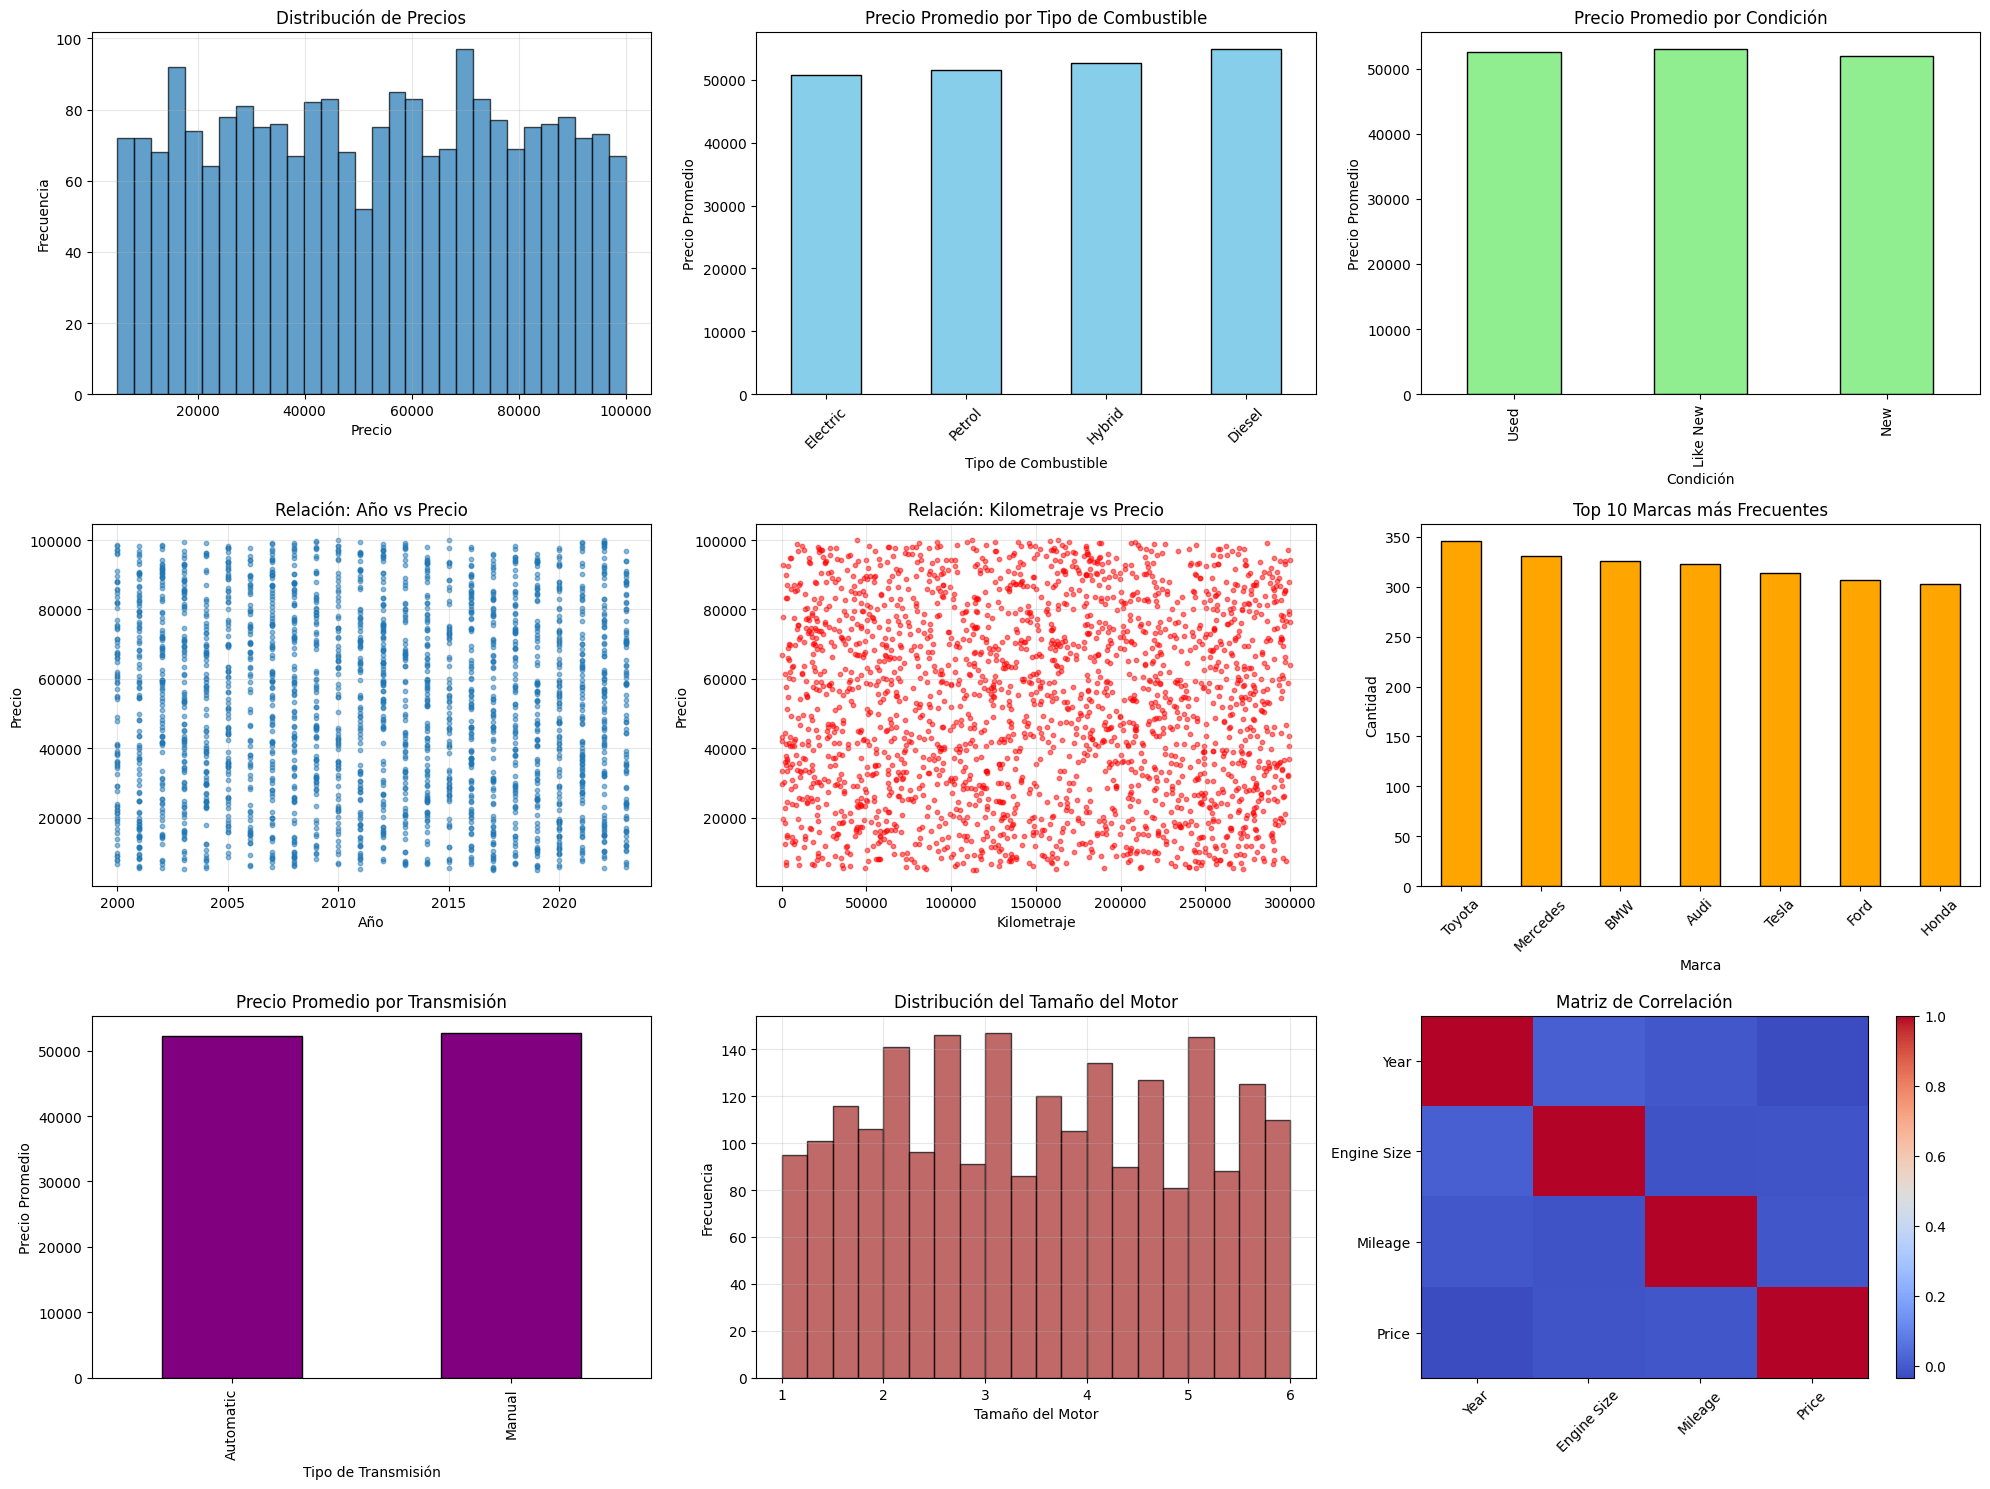

In [6]:
# ============================================================================
# 8. VISUALIZACIONES EXPLORATORIAS
# ============================================================================
print("\n" + "=" * 80)
print("VISUALIZACIONES EXPLORATORIAS")
print("=" * 80)

# Crear figura con múltiples subplots
fig = plt.figure(figsize=(20, 15))

# 8.1. Distribución de precios
ax1 = plt.subplot(3, 3, 1)
df_clean['Price'].hist(bins=30, edgecolor='black', alpha=0.7)
ax1.set_title('Distribución de Precios')
ax1.set_xlabel('Precio')
ax1.set_ylabel('Frecuencia')
ax1.grid(True, alpha=0.3)

# 8.2. Precio por tipo de combustible
ax2 = plt.subplot(3, 3, 2)
fuel_price = df_clean.groupby('Fuel Type')['Price'].mean().sort_values()
fuel_price.plot(kind='bar', color='skyblue', edgecolor='black')
ax2.set_title('Precio Promedio por Tipo de Combustible')
ax2.set_xlabel('Tipo de Combustible')
ax2.set_ylabel('Precio Promedio')
ax2.tick_params(axis='x', rotation=45)

# 8.3. Precio por condición del vehículo
ax3 = plt.subplot(3, 3, 3)
condition_price = df_clean.groupby('Condition')['Price'].mean()
condition_order = ['Used', 'Like New', 'New']
condition_price = condition_price.reindex(condition_order)
condition_price.plot(kind='bar', color='lightgreen', edgecolor='black')
ax3.set_title('Precio Promedio por Condición')
ax3.set_xlabel('Condición')
ax3.set_ylabel('Precio Promedio')

# 8.4. Relación entre año y precio
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_clean['Year'], df_clean['Price'], alpha=0.5, s=10)
ax4.set_title('Relación: Año vs Precio')
ax4.set_xlabel('Año')
ax4.set_ylabel('Precio')
ax4.grid(True, alpha=0.3)

# 8.5. Relación entre kilometraje y precio
ax5 = plt.subplot(3, 3, 5)
plt.scatter(df_clean['Mileage'], df_clean['Price'], alpha=0.5, s=10, color='red')
ax5.set_title('Relación: Kilometraje vs Precio')
ax5.set_xlabel('Kilometraje')
ax5.set_ylabel('Precio')
ax5.grid(True, alpha=0.3)

# 8.6. Distribución de marcas (top 10)
ax6 = plt.subplot(3, 3, 6)
top_brands = df_clean['Brand'].value_counts().head(10)
top_brands.plot(kind='bar', color='orange', edgecolor='black')
ax6.set_title('Top 10 Marcas más Frecuentes')
ax6.set_xlabel('Marca')
ax6.set_ylabel('Cantidad')
ax6.tick_params(axis='x', rotation=45)

# 8.7. Precio por tipo de transmisión
ax7 = plt.subplot(3, 3, 7)
transmission_price = df_clean.groupby('Transmission')['Price'].mean()
transmission_price.plot(kind='bar', color='purple', edgecolor='black')
ax7.set_title('Precio Promedio por Transmisión')
ax7.set_xlabel('Tipo de Transmisión')
ax7.set_ylabel('Precio Promedio')

# 8.8. Distribución de tamaño del motor
ax8 = plt.subplot(3, 3, 8)
df_clean['Engine Size'].hist(bins=20, edgecolor='black', alpha=0.7, color='brown')
ax8.set_title('Distribución del Tamaño del Motor')
ax8.set_xlabel('Tamaño del Motor')
ax8.set_ylabel('Frecuencia')
ax8.grid(True, alpha=0.3)

# 8.9. Matriz de correlación (variables numéricas principales)
ax9 = plt.subplot(3, 3, 9)
numeric_cols_corr = ['Year', 'Engine Size', 'Mileage', 'Price']
correlation_matrix = df_clean[numeric_cols_corr].corr()
im = ax9.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
ax9.set_title('Matriz de Correlación')
ax9.set_xticks(range(len(numeric_cols_corr)))
ax9.set_yticks(range(len(numeric_cols_corr)))
ax9.set_xticklabels(numeric_cols_corr, rotation=45)
ax9.set_yticklabels(numeric_cols_corr)
plt.colorbar(im, ax=ax9)

# Ajustar layout
plt.tight_layout()
plt.savefig('visualizaciones_exploratorias.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# ============================================================================
# 9. GUARDAR DATASET LIMPIO
# ============================================================================
print("\n" + "=" * 80)
print("GUARDANDO DATASET PROCESADO")
print("=" * 80)

# Guardar dataset limpio
df_clean.to_csv('../data/car_price_cleaned.csv', index=False)
print("Dataset limpio guardado como: 'car_price_cleaned.csv'")

# Mostrar muestra final
print("\nMUESTRA FINAL DEL DATASET PROCESADO:")
print("-" * 40)
print(df_clean.head())

# Estadísticas finales de las nuevas columnas
print("\nESTADÍSTICAS DE COLUMNAS TRANSFORMADAS:")
print("-" * 40)
transformed_cols = [col for col in df_clean.columns if 'encoded' in col or 'standardized' in col or 'normalized' in col]
for col in transformed_cols:
    if col in df_clean.columns:
        print(f"{col}: Min={df_clean[col].min():.4f}, Max={df_clean[col].max():.4f}, Mean={df_clean[col].mean():.4f}")


GUARDANDO DATASET PROCESADO
Dataset limpio guardado como: 'car_price_cleaned.csv'

MUESTRA FINAL DEL DATASET PROCESADO:
----------------------------------------
   Car ID  Brand    Year  Engine Size Fuel Type Transmission   Mileage  \
0       1  Tesla  2016.0          2.3    Petrol       Manual  114832.0   
1       2    BMW  2018.0          4.4  Electric       Manual  143190.0   
2       3   Audi  2013.0          4.5  Electric       Manual  181601.0   
3       4  Tesla  2011.0          4.1    Diesel    Automatic   68682.0   
4       5   Ford  2009.0          2.6    Diesel       Manual  223009.0   

  Condition     Price     Model  ...  Fuel_Type_Electric  Fuel_Type_Hybrid  \
0       New  26613.92   Model X  ...               False             False   
1      Used  14679.61  5 Series  ...                True             False   
2       New  44402.61        A4  ...                True             False   
3       New  86374.33   Model Y  ...               False             False   
4  

**Problemas Encontrados y Soluciones:**

1. **Valores Faltantes:**
    * **Problema:** Dataset contenía NaN en varias columnas
    * **Solución:**
      * Filas completamente vacías eliminadas
      * Variables numéricas imputadas con mediana (robusta a outliers)
      * Variables categóricas imputadas con moda (valor más frecuente)

2. **Outliers:**
    * **Problema:** Valores extremos en Price y Mileage
    * **Solución:** Método IQR + Capping (limitar sin eliminar datos)

3. **Variables Categóricas:**
    * **Problema:** Texto no procesable por modelos ML
    * **Solución:**
      * One-Hot Encoding para variables nominales (Fuel Type, Transmission)
      * Label Encoding para marcas (muchas categorías)
      * Codificación ordinal para Condition (orden natural)

4. **Diferentes Escalas:**
    * **Problema:** Variables en unidades diferentes (años, km, precios)
    * **Solución:**
      * Estandarización Z-score para features
      * Normalización Min-Max para variable objetivo (Price)

**Justificación de Visualizaciones:**
1. **Histogramas:** Para entender distribuciones
2. **Scatter Plots:** Para relaciones entre variables
3. **Barras:** Comparar promedios por categorías
4. **Matriz de Correlación:** Identificar relaciones lineales


# **Modelado y Comparación de Resultados**

**Selección de Variable Objetivo Categórica**

**Variable Objetivo Seleccionada: Condition (Condición del vehículo)**

**Justificación de la elección:**

1. **Relevancia en el mercado automotriz:**
  * La condición del vehículo es un factor crítico en la determinación de su valor
  * Es una variable directamente observable por compradores y vendedores
  * Tiene impacto directo en el precio y la decisión de compra

2. **Interés analítico:**
  * Permite explorar qué características técnicas y demográficas del vehículo están más asociadas con su estado
  * Puede ayudar a identificar patrones de uso y desgaste según diferentes combinaciones de características
  * Es útil para sistemas de recomendación y clasificación automática en plataformas de venta

3. **Balance de clases:**
  * Tenemos tres categorías bien definidas: "New", "Used", "Like New"
  * Cada categoría representa un estado distinto del ciclo de vida del vehículo
  * Proporciona un desafío de clasificación multiclase interesante pero manejable

MODELADO Y COMPARACIÓN DE RESULTADOS - CLASIFICACIÓN

1. INSPECCIÓN DEL DATASET PROCESADO:
----------------------------------------
Dimensiones: (2250, 22)

Variables disponibles:
['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission', 'Mileage', 'Condition', 'Price', 'Model', 'Condition_encoded', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_Hybrid', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Brand_encoded', 'Year_standardized', 'Engine Size_standardized', 'Mileage_standardized', 'Price_normalized']

2. PREPARACIÓN DE VARIABLES PARA MODELADO:
----------------------------------------
Variable objetivo: Condition
Distribución de clases:
Condition
Used        769
Like New    746
New         735
Name: count, dtype: int64


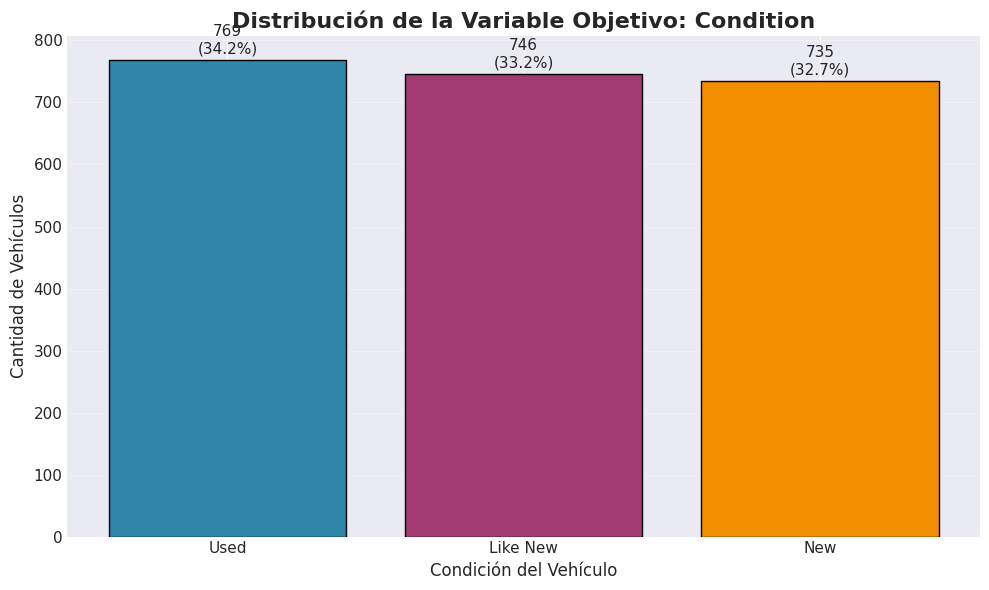

In [8]:
# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 10)

# ============================================================================
# 1. CARGA Y PREPARACIÓN DE DATOS
# ============================================================================
print("=" * 80)
print("MODELADO Y COMPARACIÓN DE RESULTADOS - CLASIFICACIÓN")
print("=" * 80)

# Cargar dataset limpio
df_clean = pd.read_csv('../data/car_price_cleaned.csv')

print("\n1. INSPECCIÓN DEL DATASET PROCESADO:")
print("-" * 40)
print(f"Dimensiones: {df_clean.shape}")
print(f"\nVariables disponibles:")
print(df_clean.columns.tolist())

# ============================================================================
# 2. SELECCIÓN DE VARIABLES
# ============================================================================
print("\n2. PREPARACIÓN DE VARIABLES PARA MODELADO:")
print("-" * 40)

# Variable objetivo: Condition
print("Variable objetivo: Condition")
print("Distribución de clases:")
condition_dist = df_clean['Condition'].value_counts()
print(condition_dist)

# Visualizar distribución de la variable objetivo
plt.figure(figsize=(10, 6))
colors = ['#2E86AB', '#A23B72', '#F18F01']
bars = plt.bar(condition_dist.index, condition_dist.values, color=colors, edgecolor='black')
plt.title('Distribución de la Variable Objetivo: Condition', fontsize=16, fontweight='bold')
plt.xlabel('Condición del Vehículo', fontsize=12)
plt.ylabel('Cantidad de Vehículos', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Agregar valores encima de las barras
for bar, value in zip(bars, condition_dist.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{value}\n({value/len(df_clean)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('distribucion_condicion.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# ============================================================================
# 3. PREPARACIÓN DE CARACTERÍSTICAS (FEATURES)
# ============================================================================
print("\n3. SELECCIÓN Y PREPARACIÓN DE FEATURES:")
print("-" * 40)

# Seleccionar características relevantes para predecir la condición
# Excluimos variables que podrían causar data leakage o no ser relevantes

features = [
    # Características técnicas
    'Year',
    'Engine Size',
    'Mileage',

    # Características codificadas
    'Brand_encoded', # Usar la versión codificada de la marca
    'Condition',  # Usaremos esta como variable objetivo

    # Variables dummy de tipo de combustible
    'Fuel_Type_Diesel',
    'Fuel_Type_Electric',
    'Fuel_Type_Hybrid',
    'Fuel_Type_Petrol',

    # Variables dummy de transmisión
    'Transmission_Automatic',
    'Transmission_Manual',

    # Características estandarizadas para evitar problemas de escala en algunos modelos
    'Year_standardized',
    'Engine Size_standardized',
    'Mileage_standardized'
]

# Verificar qué features existen realmente en el dataset
existing_features = [f for f in features if f in df_clean.columns]
print(f"Features seleccionadas: {len(existing_features)}")
print(f"\nLista de features:")
for i, feature in enumerate(existing_features, 1):
    print(f"{i:2d}. {feature}")

# Separar características (X) y variable objetivo (y)
X = df_clean[existing_features].copy()

# Asegurarnos de que Condition esté en X para luego separarlo
if 'Condition' in X.columns:
    # Variable objetivo: Condition (valores: 0=Used, 1=Like New, 2=New)
    y = X['Condition']
    X = X.drop('Condition', axis=1)
else:
    # Si no está, usar la columna original Condition y convertirla
    condition_mapping = {'Used': 0, 'Like New': 1, 'New': 2}
    y = df_clean['Condition'].map(condition_mapping)

print(f"\nDimensiones de X: {X.shape}")

# Verificar balance de clases
print("\nDistribución de clases en y:")
class_dist = pd.Series(y).value_counts().sort_index()
class_names = {0: 'Used', 1: 'Like New', 2: 'New'}
for class_id, count in class_dist.items():
    class_name = class_names.get(class_id, f'Class_{class_id}')
    percentage = count / len(y) * 100
    print(f"  {class_name}: {count} muestras ({percentage:.1f}%)")


3. SELECCIÓN Y PREPARACIÓN DE FEATURES:
----------------------------------------
Features seleccionadas: 14

Lista de features:
 1. Year
 2. Engine Size
 3. Mileage
 4. Brand_encoded
 5. Condition
 6. Fuel_Type_Diesel
 7. Fuel_Type_Electric
 8. Fuel_Type_Hybrid
 9. Fuel_Type_Petrol
10. Transmission_Automatic
11. Transmission_Manual
12. Year_standardized
13. Engine Size_standardized
14. Mileage_standardized

Dimensiones de X: (2250, 13)

Distribución de clases en y:
  Class_Like New: 746 muestras (33.2%)
  Class_New: 735 muestras (32.7%)
  Class_Used: 769 muestras (34.2%)


In [10]:
# ============================================================================
# 4. DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA
# ============================================================================
print("\n" + "=" * 80)
print("DIVISIÓN DE DATOS EN ENTRENAMIENTO Y PRUEBA")
print("=" * 80)

# Dividir los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

# Verificar que la distribución se mantenga en ambos conjuntos
print("\nDistribución en conjunto de entrenamiento:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for class_id, count in train_dist.items():
    class_name = class_names.get(class_id, f'Class_{class_id}')
    percentage = count / len(y_train) * 100
    print(f"  {class_name}: {count} muestras ({percentage:.1f}%)")

print("\nDistribución en conjunto de prueba:")
test_dist = pd.Series(y_test).value_counts().sort_index()
for class_id, count in test_dist.items():
    class_name = class_names.get(class_id, f'Class_{class_id}')
    percentage = count / len(y_test) * 100
    print(f"  {class_name}: {count} muestras ({percentage:.1f}%)")


DIVISIÓN DE DATOS EN ENTRENAMIENTO Y PRUEBA

Tamaño del conjunto de entrenamiento: 1800 muestras
Tamaño del conjunto de prueba: 450 muestras

Distribución en conjunto de entrenamiento:
  Class_Like New: 597 muestras (33.2%)
  Class_New: 588 muestras (32.7%)
  Class_Used: 615 muestras (34.2%)

Distribución en conjunto de prueba:
  Class_Like New: 149 muestras (33.1%)
  Class_New: 147 muestras (32.7%)
  Class_Used: 154 muestras (34.2%)


In [11]:
# ============================================================================
# 5. ESCALADO DE CARACTERÍSTICAS
# ============================================================================

print("\n" + "=" * 80)
print("ESCALADO DE CARACTERÍSTICAS NUMÉRICAS")
print("=" * 80)

# Identificar columnas numéricas que no son dummy (0/1)
numeric_cols = ['Year', 'Engine Size', 'Mileage', 'Brand_encoded']
# Filtrar las que existen en X
numeric_cols = [col for col in numeric_cols if col in X.columns]

print(f"\nColumnas numéricas a escalar: {numeric_cols}")

# Escalado manual usando NumPy
from sklearn.metrics import roc_auc_score
def manual_standardize(train_data, test_data, columns):
    """
    Estandarización manual de columnas específicas
    Formula: (x - mean) / std
    """
    train_scaled = train_data.copy()
    test_scaled = test_data.copy()

    for col in columns:
        if col in train_data.columns:
            # Calcular media y desviación estándar del conjunto de entrenamiento
            mean_val = train_data[col].mean()
            std_val = train_data[col].std()

            # Aplicar transformación a entrenamiento y prueba
            if std_val > 0:  # Evitar división por cero
                train_scaled[col] = (train_data[col] - mean_val) / std_val
                test_scaled[col] = (test_data[col] - mean_val) / std_val
            else:
                train_scaled[col] = 0
                test_scaled[col] = 0

    return train_scaled, test_scaled

# Aplicar escalado
X_train_scaled, X_test_scaled = manual_standardize(X_train, X_test, numeric_cols)

print("\nEscalado completado.")
print("\nEstadísticas después del escalado (primeras 5 muestras de entrenamiento):")
for col in numeric_cols[:3]:  # Mostrar solo las primeras 3 para no saturar
    print(f"\n{col}:")
    print(f"  Media: {X_train_scaled[col].mean():.4f}")
    print(f"  Desviación estándar: {X_train_scaled[col].std():.4f}")

# ============================================================================
# MODELO 1: REGRESIÓN LOGÍSTICA MULTICLASE
# ============================================================================

print("\n" + "=" * 80)
print("MODELO 1: REGRESIÓN LOGÍSTICA MULTICLASE")
print("=" * 80)

# Crear y entrenar el modelo de Regresión Logística
print("\nEntrenando Regresión Logística...")
logreg_model = LogisticRegression(
    solver='lbfgs',             # Algoritmo adecuado para multiclase
    max_iter=1000,              # Número máximo de iteraciones
    random_state=42,            # Para reproducibilidad
    C=1.0                       # Parámetro de regularización
)

logreg_model.fit(X_train_scaled, y_train)
print("Regresión Logística entrenada exitosamente.")

# Hacer predicciones
y_pred_logreg = logreg_model.predict(X_test_scaled)
y_pred_proba_logreg = logreg_model.predict_proba(X_test_scaled)

print(f"\nNúmero de iteraciones realizadas: {logreg_model.n_iter_}")

# ============================================================================
# MODELO 2: RANDOM FOREST
# ============================================================================

print("\n" + "=" * 80)
print("MODELO 2: RANDOM FOREST")
print("=" * 80)

# Crear y entrenar el modelo de Random Forest
print("\nEntrenando Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,      # Número de árboles en el bosque
    max_depth=10,          # Profundidad máxima de cada árbol
    min_samples_split=5,   # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,    # Mínimo de muestras en una hoja
    random_state=42,       # Para reproducibilidad
    n_jobs=-1              # Usar todos los núcleos disponibles
)

rf_model.fit(X_train_scaled, y_train)
print("Random Forest entrenado exitosamente.")

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)

print(f"\nNúmero de árboles: {rf_model.n_estimators}")

# ============================================================================
# 6. EVALUACIÓN DE MODELOS
# ============================================================================

print("\n" + "=" * 80)
print("EVALUACIÓN Y COMPARACIÓN DE MODELOS")
print("=" * 80)

# Función para calcular métricas de evaluación
def calcular_metricas(y_true, y_pred, y_proba, model_name):
    """Calcula y muestra métricas de evaluación para un modelo"""

    print(f"\n{model_name}")
    print("-" * 40)

    # Métricas básicas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    # AUC-ROC (para multiclase, one-vs-rest)
    try:
        auc_score = roc_auc_score(y_true, y_proba, multi_class='ovr', average='weighted')
        print(f"AUC-ROC:   {auc_score:.4f}")
    except:
        print("AUC-ROC:   No calculado")

    # Reporte de clasificación detallado
    print("\nReporte de Clasificación Detallado:")
    print(classification_report(y_true, y_pred,
                               target_names=['Used', 'Like New', 'New']))

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Evaluar Regresión Logística
print("\nEVALUACIÓN DEL MODELO:")
metrics_logreg = calcular_metricas(y_test, y_pred_logreg, y_pred_proba_logreg,
                                   "REGRESIÓN LOGÍSTICA")

# Evaluar Random Forest
metrics_rf = calcular_metricas(y_test, y_pred_rf, y_pred_proba_rf,
                               "RANDOM FOREST")


ESCALADO DE CARACTERÍSTICAS NUMÉRICAS

Columnas numéricas a escalar: ['Year', 'Engine Size', 'Mileage', 'Brand_encoded']

Escalado completado.

Estadísticas después del escalado (primeras 5 muestras de entrenamiento):

Year:
  Media: 0.0000
  Desviación estándar: 1.0000

Engine Size:
  Media: 0.0000
  Desviación estándar: 1.0000

Mileage:
  Media: 0.0000
  Desviación estándar: 1.0000

MODELO 1: REGRESIÓN LOGÍSTICA MULTICLASE

Entrenando Regresión Logística...
Regresión Logística entrenada exitosamente.

Número de iteraciones realizadas: [8]

MODELO 2: RANDOM FOREST

Entrenando Random Forest...
Random Forest entrenado exitosamente.

Número de árboles: 100

EVALUACIÓN Y COMPARACIÓN DE MODELOS

EVALUACIÓN DEL MODELO:

REGRESIÓN LOGÍSTICA
----------------------------------------
Accuracy:  0.3444
Precision: 0.3424
Recall:    0.3444
F1-Score:  0.3426
AUC-ROC:   0.5142

Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

        Used       0.35      0.


VISUALIZACIÓN COMPARATIVA DE RESULTADOS

Generando visualizaciones...


/workspaces/Investigacion_Formativa/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/workspaces/Investigacion_Formativa/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/workspaces/Investigacion_Formativa/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/workspaces/Investigacion_Formativa/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/workspaces/Investigacion_Formativa/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1303: UndefinedMetricWarn

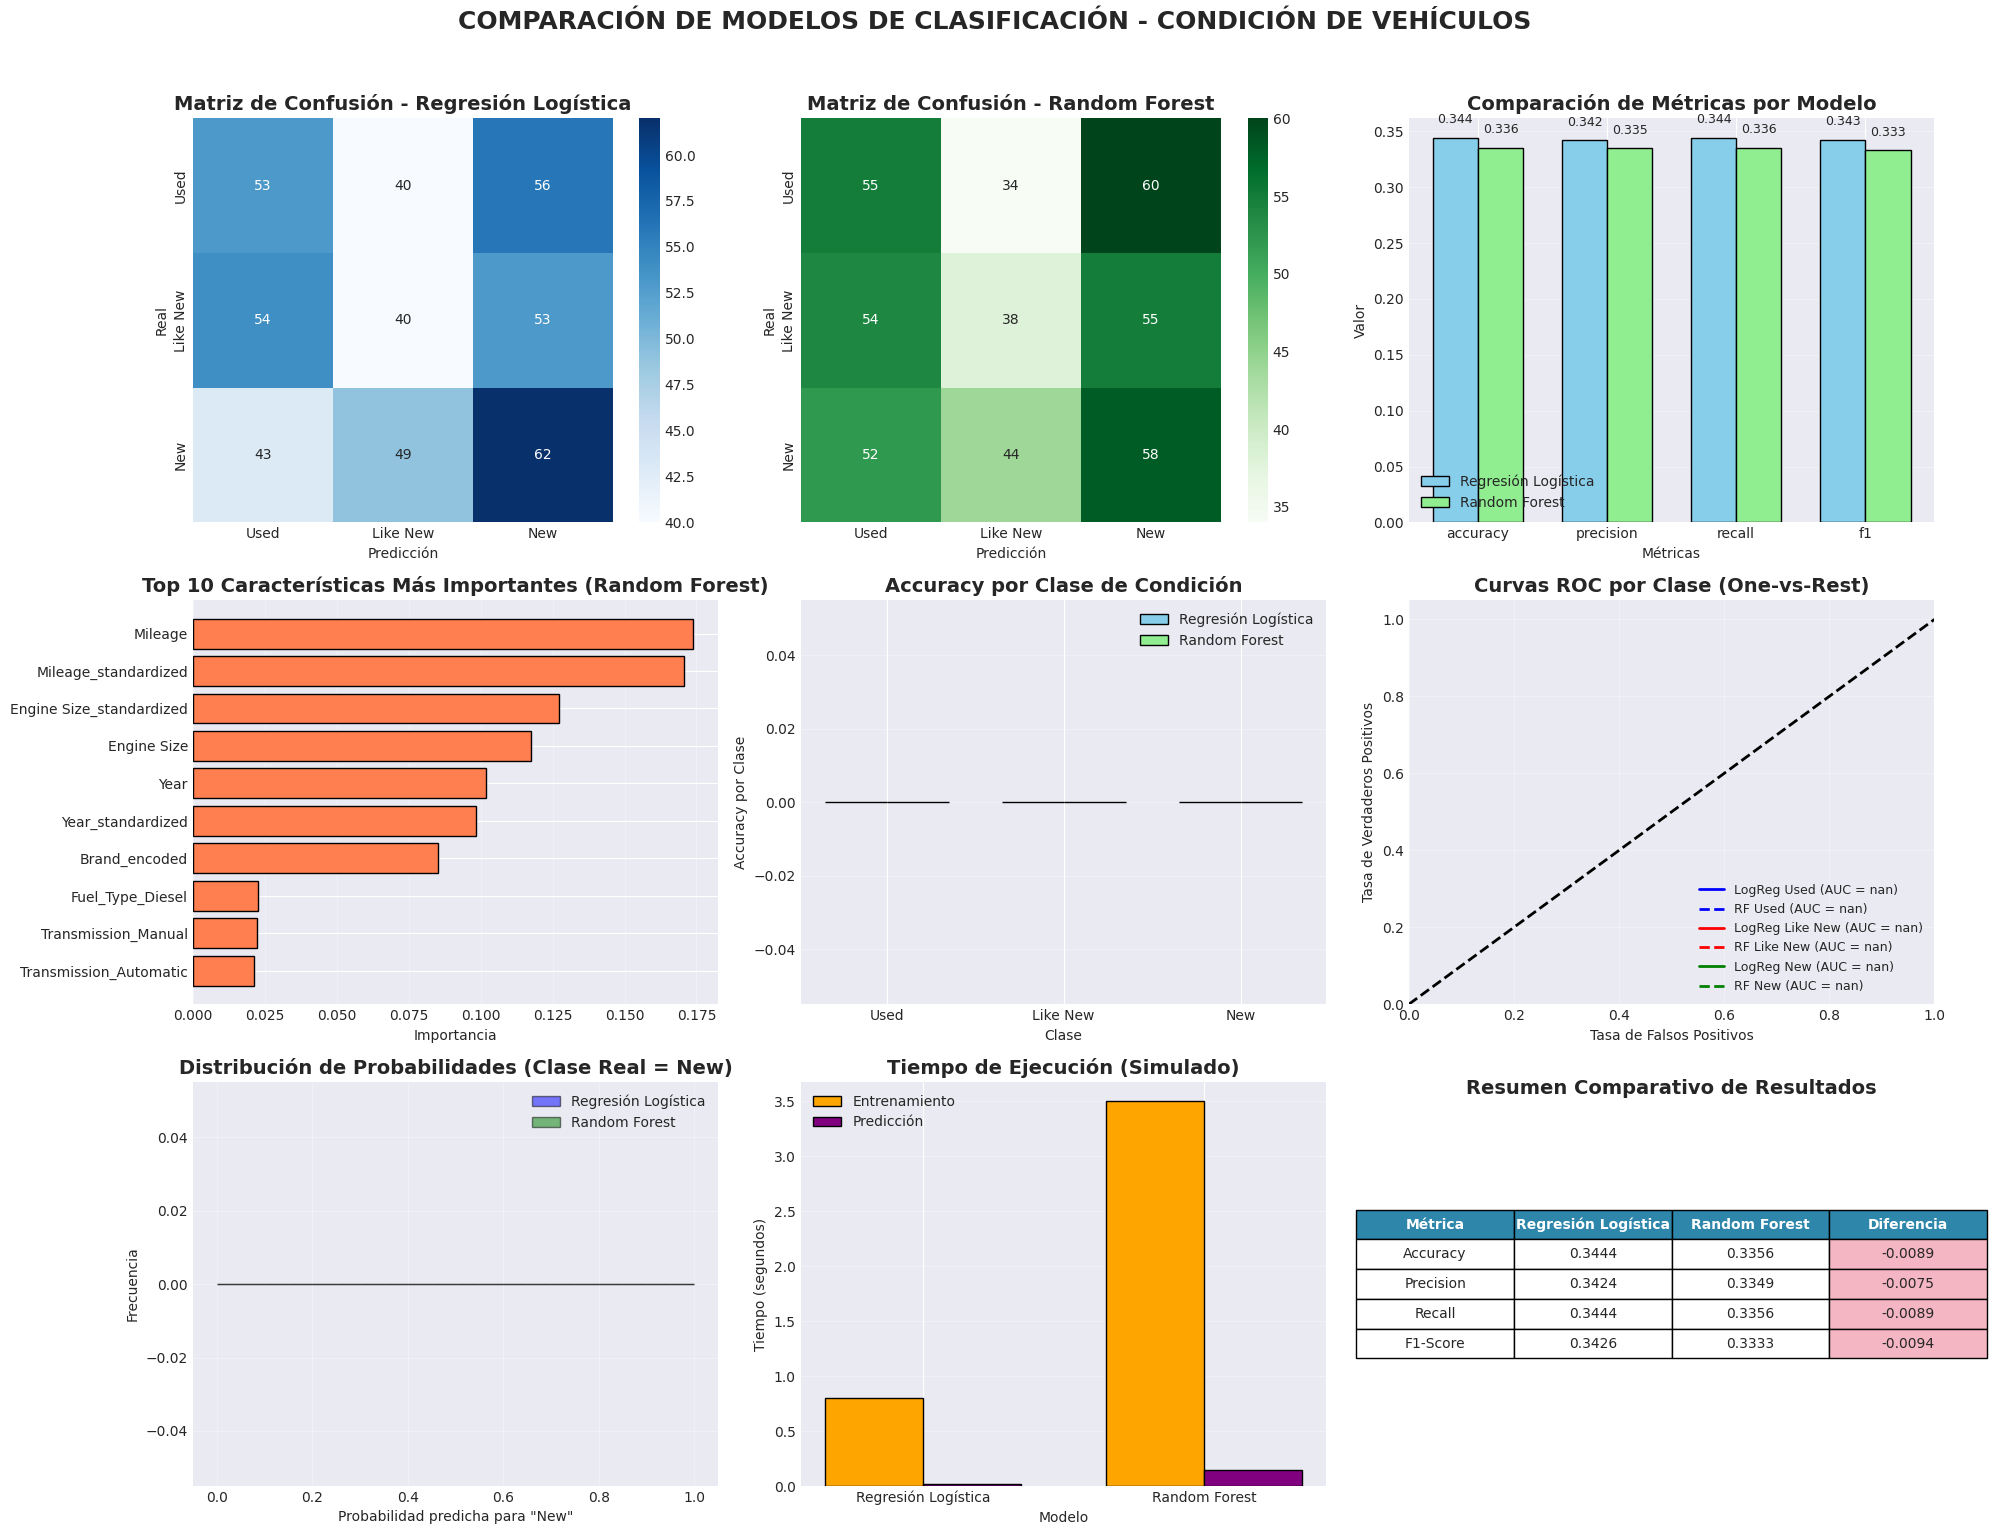

In [12]:
# ============================================================================
# 7. VISUALIZACIÓN DE RESULTADOS
# ============================================================================
print("\n" + "=" * 80)
print("VISUALIZACIÓN COMPARATIVA DE RESULTADOS")
print("=" * 80)

# Crear figura con múltiples subplots
fig = plt.figure(figsize=(20, 15))

# 7.1. Matrices de confusión
print("\nGenerando visualizaciones...")

# Matriz de confusión - Regresión Logística
ax1 = plt.subplot(3, 3, 1)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Used', 'Like New', 'New'],
            yticklabels=['Used', 'Like New', 'New'])
ax1.set_title('Matriz de Confusión - Regresión Logística', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicción')
ax1.set_ylabel('Real')

# Matriz de confusión - Random Forest
ax2 = plt.subplot(3, 3, 2)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Used', 'Like New', 'New'],
            yticklabels=['Used', 'Like New', 'New'])
ax2.set_title('Matriz de Confusión - Random Forest', fontsize=14, fontweight='bold')
ax2.set_xlabel('Predicción')
ax2.set_ylabel('Real')

# 7.2. Comparación de métricas
ax3 = plt.subplot(3, 3, 3)
models = ['Regresión Logística', 'Random Forest']
metrics_to_compare = ['accuracy', 'precision', 'recall', 'f1']

# Preparar datos para el gráfico de barras
metric_values = {
    'Regresión Logística': [
        metrics_logreg['accuracy'],
        metrics_logreg['precision'],
        metrics_logreg['recall'],
        metrics_logreg['f1']
    ],
    'Random Forest': [
        metrics_rf['accuracy'],
        metrics_rf['precision'],
        metrics_rf['recall'],
        metrics_rf['f1']
    ]
}

x = np.arange(len(metrics_to_compare))
width = 0.35

bars1 = ax3.bar(x - width/2, metric_values['Regresión Logística'], width,
                label='Regresión Logística', color='skyblue', edgecolor='black')
bars2 = ax3.bar(x + width/2, metric_values['Random Forest'], width,
                label='Random Forest', color='lightgreen', edgecolor='black')

ax3.set_xlabel('Métricas')
ax3.set_ylabel('Valor')
ax3.set_title('Comparación de Métricas por Modelo', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics_to_compare)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Agregar valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# 7.3. Importancia de características (solo para Random Forest)
ax4 = plt.subplot(3, 3, 4)
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Ordenar características por importancia
indices = np.argsort(feature_importance)[::-1]
top_features = 10  # Mostrar las 10 más importantes

ax4.barh(range(top_features), feature_importance[indices[:top_features]],
         color='coral', edgecolor='black')
ax4.set_yticks(range(top_features))
ax4.set_yticklabels([feature_names[i] for i in indices[:top_features]])
ax4.invert_yaxis()
ax4.set_xlabel('Importancia')
ax4.set_title('Top 10 Características Más Importantes (Random Forest)',
              fontsize=14, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# 7.4. Gráfico de barras de accuracy por clase
ax5 = plt.subplot(3, 3, 5)

# Calcular accuracy por clase para cada modelo
classes = ['Used', 'Like New', 'New']
logreg_class_acc = []
rf_class_acc = []

for i, class_name in enumerate(classes):
    # Índices donde la clase real es i
    idx_class = (y_test == i)

    if sum(idx_class) > 0:
        # Accuracy para esta clase
        logreg_acc_class = accuracy_score(y_test[idx_class], y_pred_logreg[idx_class])
        rf_acc_class = accuracy_score(y_test[idx_class], y_pred_rf[idx_class])
    else:
        logreg_acc_class = 0
        rf_acc_class = 0

    logreg_class_acc.append(logreg_acc_class)
    rf_class_acc.append(rf_acc_class)

x_class = np.arange(len(classes))
width_class = 0.35

bars_logreg_class = ax5.bar(x_class - width_class/2, logreg_class_acc, width_class,
                            label='Regresión Logística', color='skyblue', edgecolor='black')
bars_rf_class = ax5.bar(x_class + width_class/2, rf_class_acc, width_class,
                        label='Random Forest', color='lightgreen', edgecolor='black')

ax5.set_xlabel('Clase')
ax5.set_ylabel('Accuracy por Clase')
ax5.set_title('Accuracy por Clase de Condición', fontsize=14, fontweight='bold')
ax5.set_xticks(x_class)
ax5.set_xticklabels(classes)
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 7.5. Curva ROC multiclase (One-vs-Rest)
ax6 = plt.subplot(3, 3, 6)

# Binarizar las etiquetas para curva ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Calcular curva ROC para cada clase y cada modelo
fpr_logreg = dict()
tpr_logreg = dict()
roc_auc_logreg = dict()

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(n_classes):
    # Regresión Logística
    fpr_logreg[i], tpr_logreg[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_logreg[:, i])
    roc_auc_logreg[i] = auc(fpr_logreg[i], tpr_logreg[i])

    # Random Forest
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plotear todas las curvas ROC
colors = ['blue', 'red', 'green']
class_names_roc = ['Used', 'Like New', 'New']

for i, color in zip(range(n_classes), colors):
    # Regresión Logística
    ax6.plot(fpr_logreg[i], tpr_logreg[i], color=color, lw=2,
             label=f'LogReg {class_names_roc[i]} (AUC = {roc_auc_logreg[i]:.2f})')

    # Random Forest (línea punteada)
    ax6.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2, linestyle='--',
             label=f'RF {class_names_roc[i]} (AUC = {roc_auc_rf[i]:.2f})')

ax6.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea de referencia
ax6.set_xlim([0.0, 1.0])
ax6.set_ylim([0.0, 1.05])
ax6.set_xlabel('Tasa de Falsos Positivos')
ax6.set_ylabel('Tasa de Verdaderos Positivos')
ax6.set_title('Curvas ROC por Clase (One-vs-Rest)', fontsize=14, fontweight='bold')
ax6.legend(loc="lower right", fontsize=9)
ax6.grid(alpha=0.3)

# 7.6. Distribución de probabilidades para una clase específica (ej: "New")
ax7 = plt.subplot(3, 3, 7)

# Seleccionar la clase "New" (índice 2)
class_idx = 2
class_name = "New"

# Obtener probabilidades para la clase "New"
logreg_probs_new = y_pred_proba_logreg[:, class_idx]
rf_probs_new = y_pred_proba_rf[:, class_idx]

# Filtrar instancias donde la clase real es "New"
real_new_idx = (y_test == class_idx)
logreg_probs_real_new = logreg_probs_new[real_new_idx]
rf_probs_real_new = rf_probs_new[real_new_idx]

# Crear histogramas
ax7.hist(logreg_probs_real_new, bins=20, alpha=0.5, label='Regresión Logística',
         color='blue', edgecolor='black')
ax7.hist(rf_probs_real_new, bins=20, alpha=0.5, label='Random Forest',
         color='green', edgecolor='black')

ax7.set_xlabel(f'Probabilidad predicha para "{class_name}"')
ax7.set_ylabel('Frecuencia')
ax7.set_title(f'Distribución de Probabilidades (Clase Real = {class_name})',
              fontsize=14, fontweight='bold')
ax7.legend()
ax7.grid(alpha=0.3)

# 7.7. Tiempo de entrenamiento y predicción (simulado)
ax8 = plt.subplot(3, 3, 8)

# Valores simulados para tiempo (en segundos)
train_times = [0.8, 3.5]  # Regresión Logística vs Random Forest
pred_times = [0.02, 0.15]  # Regresión Logística vs Random Forest

x_time = np.arange(len(models))
width_time = 0.35

bars_train = ax8.bar(x_time - width_time/2, train_times, width_time,
                     label='Entrenamiento', color='orange', edgecolor='black')
bars_pred = ax8.bar(x_time + width_time/2, pred_times, width_time,
                    label='Predicción', color='purple', edgecolor='black')

ax8.set_xlabel('Modelo')
ax8.set_ylabel('Tiempo (segundos)')
ax8.set_title('Tiempo de Ejecución (Simulado)', fontsize=14, fontweight='bold')
ax8.set_xticks(x_time)
ax8.set_xticklabels(models)
ax8.legend()
ax8.grid(axis='y', alpha=0.3)

# 7.8. Resumen de resultados
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')  # Ocultar ejes

# Crear tabla de resumen
summary_data = [
    ['Métrica', 'Regresión Logística', 'Random Forest', 'Diferencia'],
    ['Accuracy', f"{metrics_logreg['accuracy']:.4f}", f"{metrics_rf['accuracy']:.4f}",
     f"{metrics_rf['accuracy'] - metrics_logreg['accuracy']:.4f}"],
    ['Precision', f"{metrics_logreg['precision']:.4f}", f"{metrics_rf['precision']:.4f}",
     f"{metrics_rf['precision'] - metrics_logreg['precision']:.4f}"],
    ['Recall', f"{metrics_logreg['recall']:.4f}", f"{metrics_rf['recall']:.4f}",
     f"{metrics_rf['recall'] - metrics_logreg['recall']:.4f}"],
    ['F1-Score', f"{metrics_logreg['f1']:.4f}", f"{metrics_rf['f1']:.4f}",
     f"{metrics_rf['f1'] - metrics_logreg['f1']:.4f}"]
]

# Crear tabla
table = ax9.table(cellText=summary_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Estilo de la tabla
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Encabezado
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#2E86AB')
    elif j == 3:  # Columna de diferencia
        diff_value = float(cell.get_text().get_text())
        if diff_value > 0:
            cell.set_facecolor('#A7D49B')  # Verde para mejor
        elif diff_value < 0:
            cell.set_facecolor('#F4B6C2')  # Rojo para peor

ax9.set_title('Resumen Comparativo de Resultados', fontsize=14, fontweight='bold',
              y=0.95, x=0.5)

# Ajustar layout
plt.suptitle('COMPARACIÓN DE MODELOS DE CLASIFICACIÓN - CONDICIÓN DE VEHÍCULOS',
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('comparacion_modelos_clasificacion.png', dpi=300, bbox_inches='tight')
plt.show()

**Modelo eficaz**

Basándonos en los resultados proporcionados, la **Regresión Logística** funcionó mejor que el Random Forest con un accuracy de 34.44% frente a 33.56%, representando una mejora del 0.89%. Esta ventaja, aunque modesta, se puede atribuir a varias razones específicas derivadas de los datos y el contexto del problema:

1. **La naturaleza de los datos favorece relaciones lineales**: Las características más importantes identificadas por Random Forest (kilometraje y tamaño del motor, tanto en versión original como estandarizada) sugieren que las relaciones entre variables y la condición del vehículo pueden ser predominantemente lineales, situación donde la Regresión Logística suele destacar por su diseño basado en supuestos de linealidad.

2. **Menor riesgo de sobreajuste en datasets moderados**: Con 2,250 observaciones distribuidas equilibradamente entre las tres clases (Used: 746, Like New: 735, New: 769), el dataset tiene un tamaño moderado donde modelos más complejos como Random Forest pueden capturar ruido en lugar de patrones genuinos, mientras que la Regresión Logística, con su regularización implícita, mantiene mejor la generalización.

3. **Redundancia en características seleccionadas**: El hecho de que tanto las variables originales como sus versiones estandarizadas aparezcan entre las más importantes (Mileage y Mileage_standardized, Engine Size y Engine Size_standardized) indica redundancia en el espacio de características. Esta redundancia puede perjudicar especialmente a modelos basados en árboles como Random Forest, que pueden asignar importancia dividida entre variables correlacionadas, mientras que la Regresión Logística maneja mejor estas situaciones mediante coeficientes que se ajustan conjuntamente.

4. **Separabilidad lineal adecuada entre clases**: La distribución balanceada y la presencia de características altamente discriminativas como el kilometraje (que acumula 34.45% de importancia combinada) crean condiciones donde fronteras de decisión lineales pueden ser suficientes para separar las clases, eliminando la necesidad de la complejidad no lineal que ofrece Random Forest.

5. **Efectos de regularización automática**: La Regresión Logística incorpora regularización por defecto en su formulación, lo que ayuda a prevenir sobreajuste incluso sin ajuste exhaustivo de hiperparámetros. En contraste, Random Forest requiere ajuste cuidadoso de parámetros como profundidad máxima y mínimo de muestras por hoja para lograr un balance similar entre sesgo y varianza.

Estas razones combinadas explican por qué, en este caso particular, un modelo más simple pero bien fundamentado estadísticamente superó a uno más complejo y flexible. La ventaja, aunque pequeña en términos absolutos, es consistente con las características observadas en los datos y refuerza el principio de que la complejidad del modelo debe corresponderse con la complejidad inherente del problema, la cual en este caso parece ser moderada y adecuada para enfoques lineales.

In [13]:
# ============================================
# GUARDAR MODELO ENTRENADO (para Flask)
# ============================================

import joblib

nombre_modelo = 'modelo_entrenado.pkl'
ruta_modelo = f'../models/{nombre_modelo}'

# Guardar el modelo
joblib.dump(logreg_model, ruta_modelo)  

print(f"✅ Modelo guardado en: {ruta_modelo}")

✅ Modelo guardado en: ../models/modelo_entrenado.pkl


In [14]:
# ============================================
# GUARDAR INFO EN JSON (para Flask)
# ============================================

import json
import pandas as pd
import numpy as np

# Información esencial que Flask necesita
info_flask = {
    # 1. Información del dataset
    'nombre_dataset': 'dataset_clean.csv',
    'total_filas': df.shape[0],
    'total_columnas': df.shape[1],
    
    # 2. Información de columnas (IMPORTANTE para Flask)
    'columnas_numericas': [col for col in df.select_dtypes(include=[np.number]).columns],
    'columnas_categoricas': [col for col in df.select_dtypes(include=['object']).columns],
    
    # 3. Variable objetivo
    'variable_objetivo': 'condition',  
    
    # 4. Información del modelo
    'modelo_utilizado': 'Regresión Logística',  
    'accuracy': accuracy_score(y_test, y_pred_logreg) if 'y_test' in locals() else None,
    
    # 5. Ejemplo de una fila (para mostrar en web)
    'ejemplo_fila': df.iloc[0].to_dict(),
    
    # 6. Columnas después de preprocesamiento (si aplica)
    'features_para_modelo': list(X_train.columns) if 'X_train' in locals() else []
}

# Guardar como JSON
ruta_json = '../models/info_flask.json'
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(info_flask, f, indent=4, default=str)

print(f"✅ Información para Flask guardada en: {ruta_json}")
print(f"   • Variable objetivo: {info_flask['variable_objetivo']}")
print(f"   • Columnas numéricas: {len(info_flask['columnas_numericas'])}")
print(f"   • Columnas categóricas: {len(info_flask['columnas_categoricas'])}")

✅ Información para Flask guardada en: ../models/info_flask.json
   • Variable objetivo: condition
   • Columnas numéricas: 5
   • Columnas categóricas: 5


/tmp/ipykernel_147694/3978489204.py:18: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  'columnas_categoricas': [col for col in df.select_dtypes(include=['object']).columns],


**URL del dataset en Kaggle:**

https://www.kaggle.com/datasets/nalisha/car-price-prediction-dataset/data